In [92]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()
print(system)
if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/Garamond.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14) # for MAC
garamond_font = FontProperties(fname="/Library/Fonts/Garamond.otf",size=14) # for WINDOWS

#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond'

Windows
C:/Windows/Fonts/Garamond.TTF


In [93]:
# Chargement des données PINGOUIN
df_indian_leaver_patient = pd.read_table("input/mlsupervise/indian_liver_patient.csv",sep=",")

feature_names = [
                    "Age of the patient",
                    "Gender of the patient",
                    "Total Bilirubin",
                    "Direct Bilirubin",
                    "Alkaline Phosphotase",
                    "Alamine Aminotransferase",
                    "Aspartate Aminotransferase",
                    "Total Protiens",
                    "Albumin",
                    "Albumin and Globulin Ratio"
                ]
class_names = ["Dataset"]

# Ajout titre colonnes
df_indian_leaver_patient.columns=feature_names + class_names
df_indian_leaver_patient.shape

# modification Genre M = 1, Genre F = 0 pour n'avoir que des int ou des float dans les features

df_indian_leaver_patient["Gender of the patient"].replace(["Male","Female"],[1,0], inplace=True)
df_indian_leaver_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age of the patient          583 non-null    int64  
 1   Gender of the patient       583 non-null    int64  
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


<Axes: >

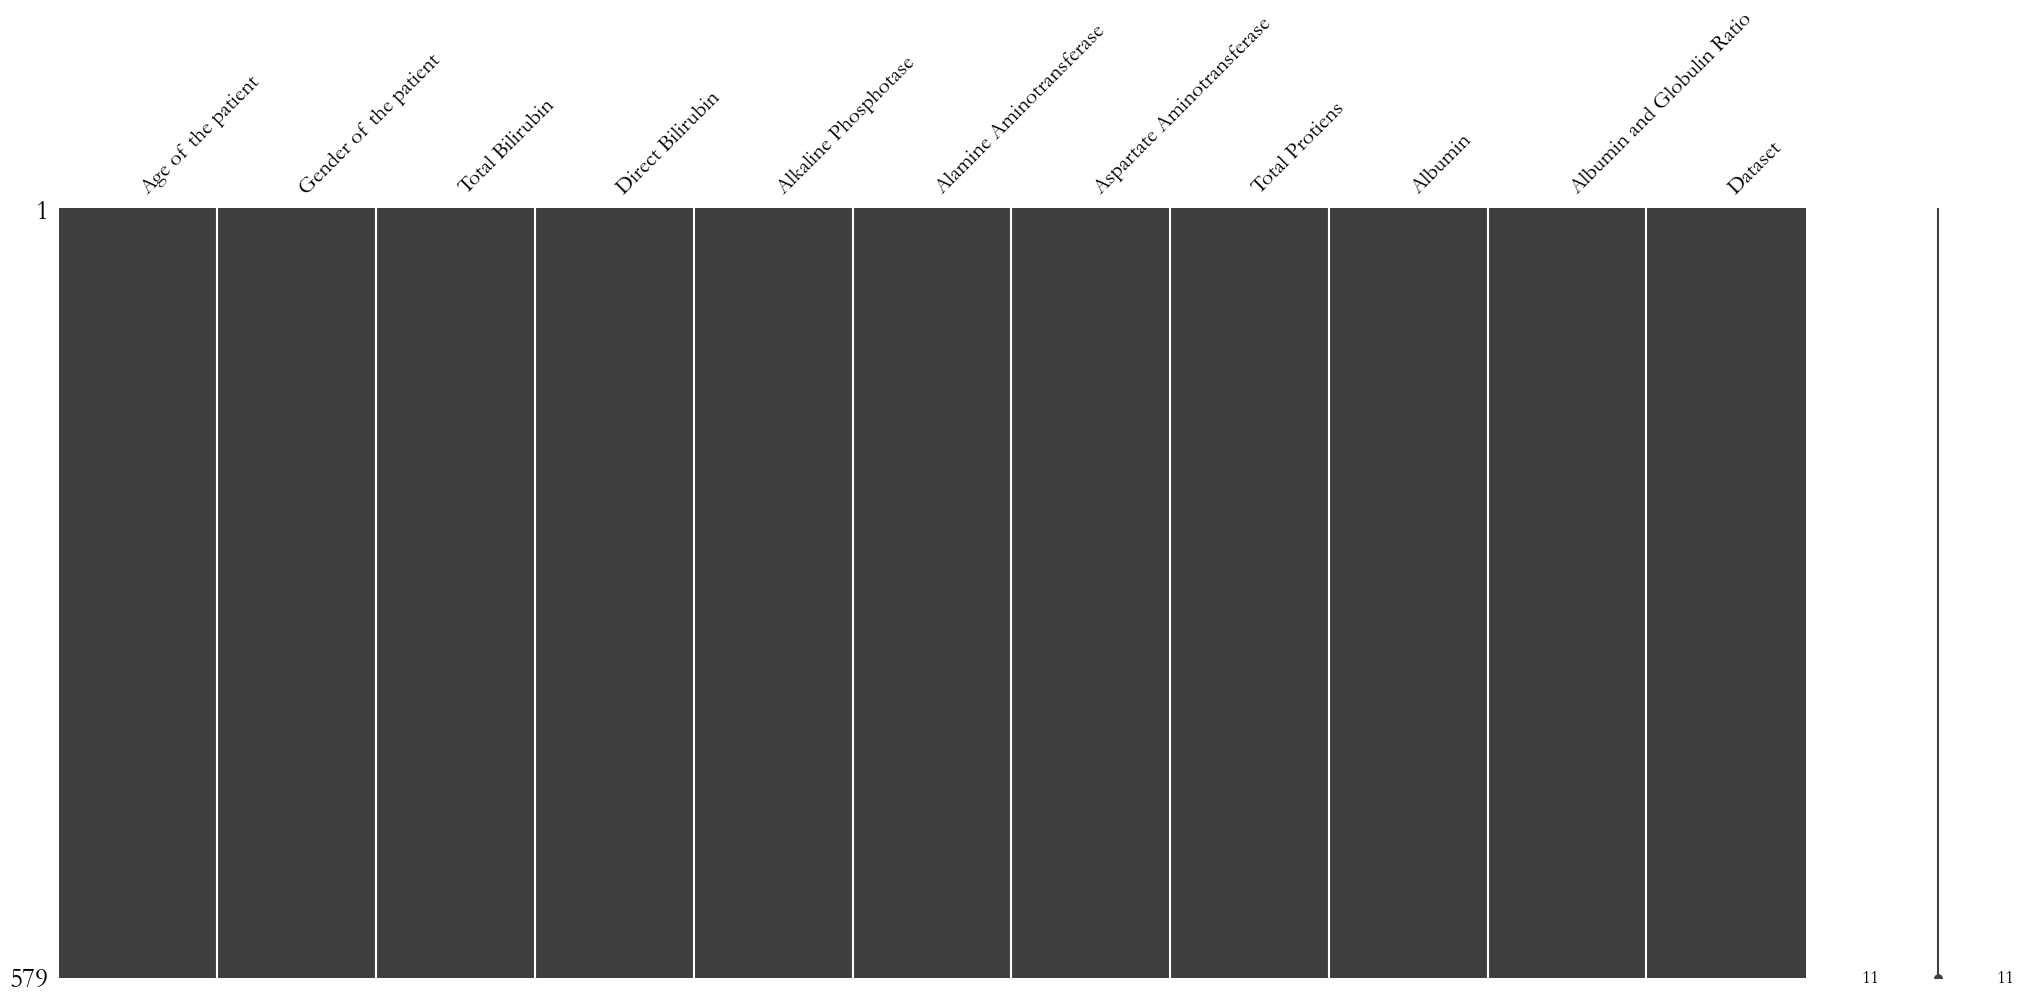

In [94]:
# drop des données NaN pour éviter des erreur de traitement par la suite

df_indian_leaver_patient.dropna(inplace=True)
msno.matrix(df_indian_leaver_patient)

In [95]:
# Jeu d'entrainement, 80% des données

# import des librairies
from sklearn.model_selection import train_test_split
y=pd.DataFrame()
y=df_indian_leaver_patient["Dataset"]
#print("y :\n", y.head(5))
X=df_indian_leaver_patient.drop(columns={"Dataset"})
#print("X:\n",X.iloc[:,0:7].head(5))


# Split du jeu de données
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, shuffle=False, stratify=None)

print(X_train.isna().count())

Age of the patient            405
Gender of the patient         405
Total Bilirubin               405
Direct Bilirubin              405
Alkaline Phosphotase          405
Alamine Aminotransferase      405
Aspartate Aminotransferase    405
Total Protiens                405
Albumin                       405
Albumin and Globulin Ratio    405
dtype: int64


In [96]:
import sklearn
from sklearn import tree
#from sklearn.tree import tree
from sklearn.ensemble import BaggingClassifier

# Entrainement d'un modèle de Classifier et de X_train, y_train
dt = BaggingClassifier(n_estimators=10, bootstrap=True, max_features=10)
dt = dt.fit(X_train,y_train)

# Prédiction à l'aide du modèle et de X_test
y_pred=dt.predict(X_test)
print("Prédiction:\n",y_pred[0:5]) # affichage de la prediction
print("y_test:\n", y_test.iloc[0:5]) # affichage de la réalité y_test pour comparaison avec la prediction

Prédiction:
 [1 1 1 1 1]
y_test:
 409    1
410    1
411    2
412    1
413    2
Name: Dataset, dtype: int64


In [97]:
# Calcul de l'accuracy

from sklearn.metrics import accuracy_score

m_perf = accuracy_score(y_test, y_pred)
m_perf = round(m_perf,2)
print("Accuracy score sur les données de test y_test\n: ", 100*m_perf,"%")

Accuracy score sur les données de test y_test
:  68.0 %


In [98]:
# Calcul du Recall

from sklearn.metrics import recall_score

recall_score_gini = recall_score(y_test,y_pred)

print("Score de rappel : ", 100*round(recall_score_gini,2),"%")


Score de rappel :  87.0 %


In [99]:
# Calcul de l'AUC et Courbe ROC

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

#print(len(y_test))
#print(len(y_pred))
auc_roc = roc_auc_score(y_true=y_test, y_score=y_pred)
print(auc_roc)



0.5454838709677419


In [100]:
# Calcul des indicateurs sur un modèle d'une forêt aléatoire

# import des librairies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Instanciation d'une forêt aléatoire et entrainement
classifier2 = RandomForestClassifier(criterion="gini", max_depth=4, min_samples_leaf=0.26, random_state=0)
classifier2 = classifier2.fit(X_train, y_train)

# prédiction
y_pred_randomforest = classifier2.predict(X_test)

# Définissez la métrique comme négative de l'erreur quadratique moyenne
print("Prédiction:\n",y_pred_randomforest[0:5]) # affichage de la prediction
print("y_test:\n", y_test.iloc[0:5]) # affichage de la réalité y_test pour comparaison avec la prediction

Prédiction:
 [1 1 1 1 1]
y_test:
 409    1
410    1
411    2
412    1
413    2
Name: Dataset, dtype: int64


In [101]:
# Calcul de l'accuracy

from sklearn.metrics import accuracy_score

m_perf = accuracy_score(y_test, y_pred_randomforest)
m_perf = round(m_perf,2)
print("Accuracy score sur les données de test y_test\n: ", 100*m_perf,"%")

Accuracy score sur les données de test y_test
:  71.0 %


In [102]:
# Calcul du Recall

from sklearn.metrics import recall_score

recall_score_gini = recall_score(y_test,y_pred)

print("Score de rappel : ", 100*round(recall_score_gini,2),"%")

Score de rappel :  87.0 %


In [103]:
# Calcul de l'AUC et Courbe ROC

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

print(len(y_test))
print(len(y_pred))
auc_roc = roc_auc_score(y_true=y_test, y_score=y_pred)
print(auc_roc)


174
174
0.5454838709677419


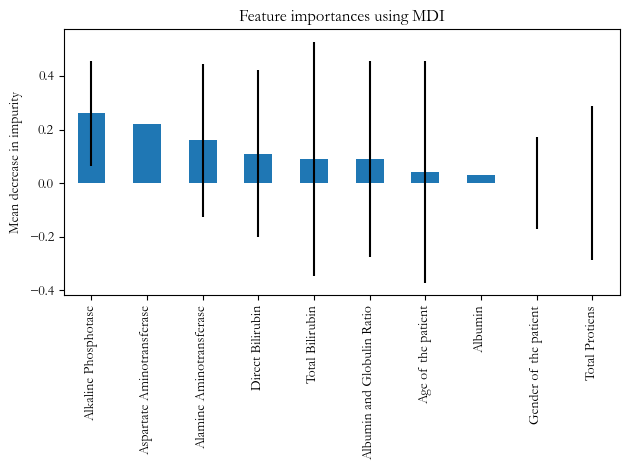

In [107]:
import numpy as np

importances = classifier2.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier2.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Important des feature")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [119]:
# GRID-SEARCH sur un modèle d'une forêt aléatoire

# import des librairies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, mean_squared_error

# Instanciation d'une forêt aléatoire et entrainement
classifier3 = RandomForestClassifier(criterion="gini", min_samples_leaf=1, min_samples_split=2, random_state=1)
classifier3 = classifier3.fit(X_train, y_train)

# Vecteurs pour les hyper paramètres
max_depth = [2,3,4]
min_samples_leaf=[0.12,0.14,0.16,0.18]

# param grid
param_grid = [
  {'max_depth': [2,3,4], 'min_samples_leaf': [0.12,0.14,0.16,0.18]},
 ]

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# instanciation
grid_dt = GridSearchCV(classifier3, param_grid, cv=cv, scoring="accuracy")
grid_dt.fit(X_train,y_train)

# meilleur modèle
print(grid_dt.best_estimator_)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.12, random_state=1)
